In [ ]:
# Some examples showing how I found  below
from ai import cdas
import json # for pretty output
import datetime as dt
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Start and stop times
st = dt.datetime(1997,1,17,0,0)
en = dt.datetime(1997,1,17,2,0)

hro1minID="OMNI_HRO_1MIN"

# Get the data
omni = cdas.get_data('sp_phys',
                     hro1minID,
                     st,
                     en,
                     ['BX_GSE','BY_GSM','BZ_GSM'])

In [38]:
#omni.keys()
by=omni['BY,_GSM']
bz=omni['BZ,_GSM']
bx=omni['BX,_GSE']
time=omni['EPOCH_TIME']

In [57]:
# Kill missing
missing=np.float64(9999.99)
by[by==missing]=np.nan
bz[bz==missing]=np.nan
bx[bx==missing]=np.nan

In [110]:
for bro in matplotlib.rcParams:
    print(bro)

_internal.classic_mode
agg.path.chunksize
animation.avconv_args
animation.avconv_path
animation.bitrate
animation.codec
animation.convert_args
animation.convert_path
animation.embed_limit
animation.ffmpeg_args
animation.ffmpeg_path
animation.frame_format
animation.html
animation.html_args
animation.writer
axes.autolimit_mode
axes.axisbelow
axes.edgecolor
axes.facecolor
axes.formatter.limits
axes.formatter.min_exponent
axes.formatter.offset_threshold
axes.formatter.use_locale
axes.formatter.use_mathtext
axes.formatter.useoffset
axes.grid
axes.grid.axis
axes.grid.which
axes.hold
axes.labelcolor
axes.labelpad
axes.labelsize
axes.labelweight
axes.linewidth
axes.prop_cycle
axes.spines.bottom
axes.spines.left
axes.spines.right
axes.spines.top
axes.titlepad
axes.titlesize
axes.titleweight
axes.unicode_minus
axes.xmargin
axes.ymargin
axes3d.grid
backend
backend.qt4
backend.qt5
backend_fallback
boxplot.bootstrap
boxplot.boxprops.color
boxplot.boxprops.linestyle
boxplot.boxprops.linewidth
boxplo

Text(0.5,1,'Orbit 1607 (1997-01-17)')

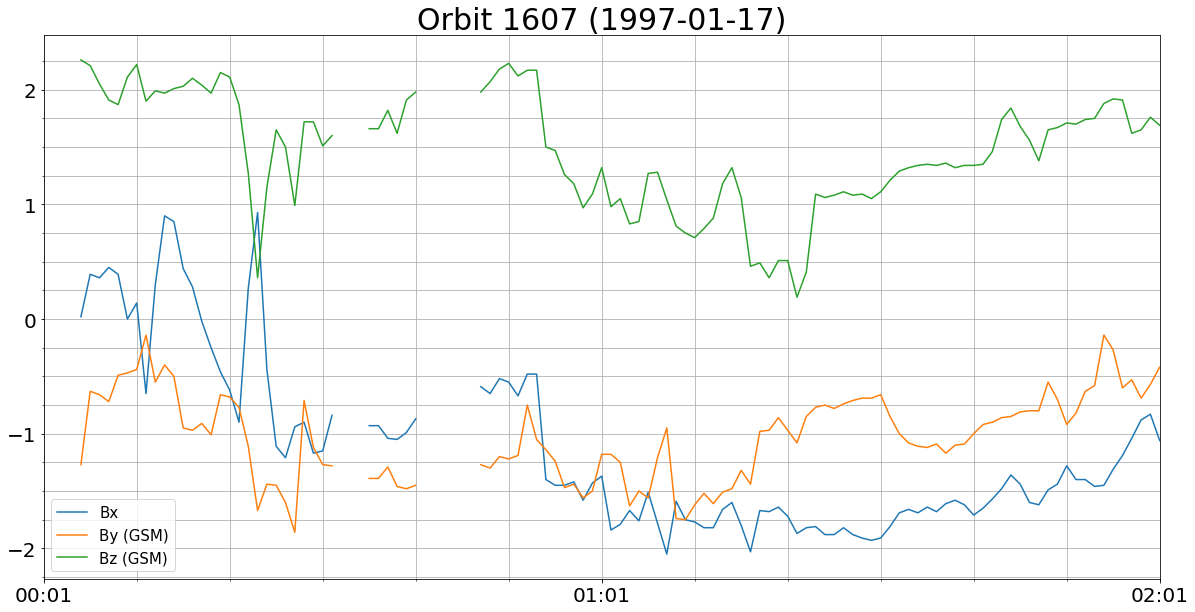

In [121]:
import matplotlib
from matplotlib.dates import YearLocator, MonthLocator, DayLocator, HourLocator, MinuteLocator, DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# Set font sizes for things
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
matplotlib.rc('axes',titlesize=30)

# Set up ticks
ymajorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(0.25)

xAxisHours = HourLocator(interval=1)   # every hour
xAxisMinutes = MinuteLocator(interval=10)  # every minute
xAxisHoursFmt = DateFormatter('%H:%m')

dates = matplotlib.dates.date2num(time)

fig, ax = plt.subplots(figsize=(20,10))

# Plot the data
ax.plot_date(dates, bx, '-')
ax.plot_date(dates, by, '-')
ax.plot_date(dates, bz, '-')

# format the ticks
ax.yaxis.set_minor_locator(yminorLocator)
ax.yaxis.set_major_locator(ymajorLocator)

ax.xaxis.set_major_locator(xAxisHours)
ax.xaxis.set_major_formatter(xAxisHoursFmt)
ax.xaxis.set_minor_locator(xAxisMinutes)
ax.set_xlim(st, en)
ax.autoscale_view()

# Grid and legend
ax.grid(which='minor',axis='both')
ax.legend(['Bx','By (GSM)','Bz (GSM)'],fontsize=15)

# Title
ax.set_title('Orbit 1607 ('+time[0].strftime('%Y-%m-%d')+')')

In [5]:
# EXAMPLE SHOWING LOTSA INSTRUMENTS
obsGroupsAndInstruments = cdas.get_observatory_groups_and_instruments(
    'istp_public',
    instrumentType='Plasma and Solar Wind'
)
#print(json.dumps(obsGroupsAndInstruments, indent=4))

In [15]:
# LOCATE VARIABLE OF INTEREST
# The thing to do here is to spot the ID of the variable that you're interested in
datasets = cdas.get_datasets(
    'istp_public',
    labelPattern='.*OMNI.*'
)
print(json.dumps(datasets, indent=4))

{
    "DatasetDescription": [
        {
            "Instrument": [
                "merged magnetic field and plasma data from cohoweb"
            ],
            "TimeInterval": {
                "Start": "1963-01-01T00:00:00.000Z",
                "End": "2018-02-22T01:00:00.000Z"
            },
            "Notes": "https://cdaweb.sci.gsfc.nasa.gov/misc/NotesO.html#OMNI_COHO1HR_MERGED_MAG_PLASMA",
            "Label": "OMNI Combined merged hourly magnetic field, plasma and ephermis data - J.H. King, N. Papatashvilli (AdnetSystems, NASA GSFC)",
            "Id": "OMNI_COHO1HR_MERGED_MAG_PLASMA",
            "ObservatoryGroup": [
                "OMNI (Combined 1AU IP Data; Magnetic and Solar Indices)",
                "ACE",
                "Wind",
                "IMP (All)"
            ],
            "InstrumentType": [
                "Plasma and Solar Wind",
                "Magnetic Fields (space)"
            ],
            "PiAffiliation": "AdnetSystems, NASA GSFC",
         

In [50]:
# Having located the variable of interest, det it
vars = cdas.get_variables('istp_public', hro1minID)
vars.keys()
that=vars['VariableDescription']
# Show names of the possibilities
for bro in that:
    # print(bro.split("'Name': ")[1])
    # print(bro)
    print(bro['Name'])

{'Name': 'IMF', 'LongDescription': 'OMNI ID code for the source spacecraft for time-shifted IMF values (see OMNI documentation link for codes)', 'ShortDescription': ''}
IMF
{'Name': 'PLS', 'LongDescription': 'OMNI ID code for the source spacecraft  for time-shifted IP plasma values (see OMNI documentation link for codes)', 'ShortDescription': ''}
PLS
{'Name': 'IMF_PTS', 'LongDescription': 'Number of fine time scale points in IMF averages', 'ShortDescription': ''}
IMF_PTS
{'Name': 'PLS_PTS', 'LongDescription': 'Number of fine time scale points in plasma averages', 'ShortDescription': ''}
PLS_PTS
{'Name': 'percent_interp', 'LongDescription': 'Percent interpolated', 'ShortDescription': ''}
percent_interp
{'Name': 'Timeshift', 'LongDescription': 'Timeshift (seconds)', 'ShortDescription': ''}
Timeshift
{'Name': 'RMS_Timeshift', 'LongDescription': 'RMS Timeshift (seconds)', 'ShortDescription': ''}
RMS_Timeshift
{'Name': 'RMS_phase', 'LongDescription': 'RMS, Phase front normal (nT) ', 'ShortD